File skipped: C:/Users/panis/OneDrive/Рабочий стол/year3/Python/Lab4/Task 1\не малюнок.txt, Error: cannot identify image file 'C:/Users/panis/OneDrive/Рабочий стол/year3/Python/Lab4/Task 1\\не малюнок.txt'
File skipped: C:/Users/panis/OneDrive/Рабочий стол/year3/Python/Lab4/Task 1\не малюнок.xlsx, Error: cannot identify image file 'C:/Users/panis/OneDrive/Рабочий стол/year3/Python/Lab4/Task 1\\не малюнок.xlsx'


File Name,Color Mode,Format,Channels,File Size (MB),Width,Height,Full Path,Thumbnail
1.jpg,RGB,JPEG,3,0.03,550,550,C:/Users/panis/OneDrive/Рабочий стол/year3/Python/Lab4/Task 1\1.jpg,
10.jpg,RGB,JPEG,3,0.14,913,843,C:/Users/panis/OneDrive/Рабочий стол/year3/Python/Lab4/Task 1\10.jpg,
11.jpg,RGB,JPEG,3,0.05,1280,1280,C:/Users/panis/OneDrive/Рабочий стол/year3/Python/Lab4/Task 1\11.jpg,
12.jpg,RGB,JPEG,3,0.02,667,1000,C:/Users/panis/OneDrive/Рабочий стол/year3/Python/Lab4/Task 1\12.jpg,
13.jpg,RGB,JPEG,3,0.06,980,980,C:/Users/panis/OneDrive/Рабочий стол/year3/Python/Lab4/Task 1\13.jpg,
14.jpg,RGB,JPEG,3,0.08,500,500,C:/Users/panis/OneDrive/Рабочий стол/year3/Python/Lab4/Task 1\14.jpg,
15.webp,RGBA,WEBP,4,0.00,1200,1200,C:/Users/panis/OneDrive/Рабочий стол/year3/Python/Lab4/Task 1\15.webp,
2.webp,RGB,WEBP,3,0.01,600,900,C:/Users/panis/OneDrive/Рабочий стол/year3/Python/Lab4/Task 1\2.webp,
3.jpg,RGB,JPEG,3,0.04,736,981,C:/Users/panis/OneDrive/Рабочий стол/year3/Python/Lab4/Task 1\3.jpg,
4.jfif,RGB,JPEG,3,0.01,194,259,C:/Users/panis/OneDrive/Рабочий стол/year3/Python/Lab4/Task 1\4.jfif,

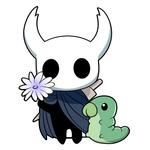
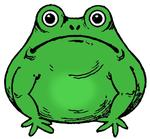
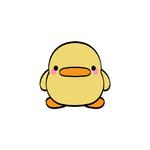
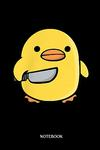
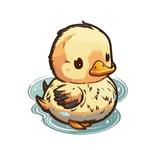
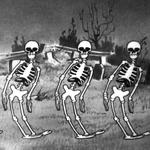
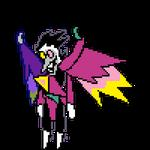
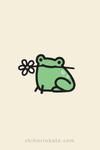
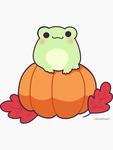
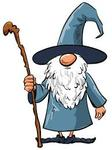
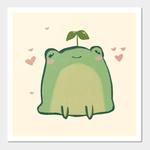
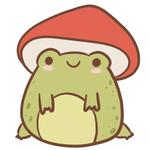
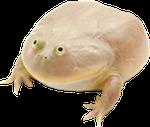
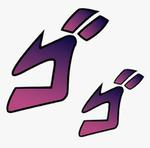
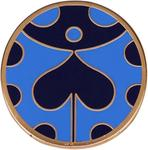

In [1]:
import os
import glob
import base64
import pandas as pd
from PIL import Image
from io import BytesIO
from IPython.display import HTML

def get_thumbnail(path, size=(150, 150)):
    img = Image.open(path)
    img.thumbnail(size, Image.LANCZOS)
    return img

def image_base64(img):
    if img.mode == 'RGBA':
        img = img.convert('RGB')
    with BytesIO() as buffer:
        img.save(buffer, 'jpeg')
        return base64.b64encode(buffer.getvalue()).decode()

def image_formatter(path):
    return f'<img src="data:image/jpeg;base64,{image_base64(get_thumbnail(path))}">'

def analyze_images(folder_path):
    image_data = []
    files = glob.glob(os.path.join(folder_path, "*"))
    for file_path in files:
        try:
            with Image.open(file_path) as img:
                file_name = os.path.basename(file_path)
                color_mode = img.mode
                image_format = img.format
                num_channels = len(img.getbands())
                file_size = round(os.path.getsize(file_path) / (1024 * 1024), 2)
                width, height = img.size
                image_data.append({
                    "File Name": file_name,
                    "Color Mode": color_mode,
                    "Format": image_format,
                    "Channels": num_channels,
                    "File Size (MB)": file_size,
                    "Width": width,
                    "Height": height,
                    "Full Path": file_path
                })
        except Exception as e:
            print(f"File skipped: {file_path}, Error: {e}")
    df = pd.DataFrame(image_data)
    if not df.empty:
        df['Thumbnail'] = df['Full Path'].map(image_formatter)
    return HTML(df.to_html(formatters={'Thumbnail': lambda x: x}, escape=False, index=False))

folder_path = r"C:/Users/panis/OneDrive/Рабочий стол/year3/Python/Lab4/Task_1"
analyze_images(folder_path)


In [9]:
import os
import random
from PIL import Image
import glob

def crop_to_square(image):
    width, height = image.size
    min_side = min(width, height)
    left = (width - min_side) // 2
    top = (height - min_side) // 2
    right = left + min_side
    bottom = top + min_side
    return image.crop((left, top, right, bottom))

def resize_image(image, size=(500, 500)):
    return image.resize(size, Image.LANCZOS)

def apply_random_filter(image):
    if image.mode == "RGBA":
        image = image.convert("RGB")
    r, g, b = image.split()
    filters = ["red", "green", "blue", "yellow", "magenta", "cyan"]
    selected_filter = random.choice(filters)
    if selected_filter == "red":
        image = Image.merge("RGB", (r, g.point(lambda p: p * 0.5), b.point(lambda p: p * 0.5)))
    elif selected_filter == "green":
        image = Image.merge("RGB", (r.point(lambda p: p * 0.5), g, b.point(lambda p: p * 0.5)))
    elif selected_filter == "blue":
        image = Image.merge("RGB", (r.point(lambda p: p * 0.5), g.point(lambda p: p * 0.5), b))
    elif selected_filter == "yellow":
        image = Image.merge("RGB", (r, g, b.point(lambda p: p * 0.5)))
    elif selected_filter == "magenta":
        image = Image.merge("RGB", (r, g.point(lambda p: p * 0.5), b))
    elif selected_filter == "cyan":
        image = Image.merge("RGB", (r.point(lambda p: p * 0.5), g, b))
    return image

def create_poster(folder_path, output_name, rows, cols, output_dir):
    images = glob.glob(os.path.join(folder_path, "*"))
    poster_width = cols * 500
    poster_height = rows * 500
    poster = Image.new("RGB", (poster_width, poster_height))
    
    for row in range(rows):
        for col in range(cols):
            img_path = random.choice(images)
            with Image.open(img_path) as img:
                img = crop_to_square(img)
                img = resize_image(img)
                img = apply_random_filter(img)
                x_offset = col * 500
                y_offset = row * 500
                poster.paste(img, (x_offset, y_offset))
    
    # Check if file exists, and if it does, add a counter to the name
    base_name, ext = os.path.splitext(output_name)
    counter = 1
    output_path = os.path.join(output_dir, output_name)
    while os.path.exists(output_path):
        output_name = f"{base_name}({counter}){ext}"
        output_path = os.path.join(output_dir, output_name)
        counter += 1
    
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    poster.save(output_path)
    print(f"Poster saved at {output_path}")

new_path = r"C:/Users/panis/OneDrive/Рабочий стол/year3/Python/Lab4/fancy"
folder_path = r"C:/Users/panis/OneDrive/Рабочий стол/year3/Python/Lab4/Task_2"

create_poster(folder_path, f"poster.jpg", 3, 4, new_path)


Poster saved at C:/Users/panis/OneDrive/Рабочий стол/year3/Python/Lab4/fancy\poster(4).jpg
